# Contents

1. Sloan Digital Sky
2. Problem Definition
3. Data Analysis (EDA)
4. Pre-processing Pipeline
5. Building Machine Learning Models
6. Concluding Remarks

# 1.Sloan Digital Sky

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

Feature Description
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

# 2.Problem Definition

To predict if the 10000 observation of space taken by the SDSS is either a star, galaxy or quasar.

# 3.Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Sloan_Digital_Sky.csv')

In [4]:
df=df.rename(columns = {'class':'category'})

In [5]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,category,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [6]:
#Lets check the count of each class in taret variables.
df.category.value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: category, dtype: int64

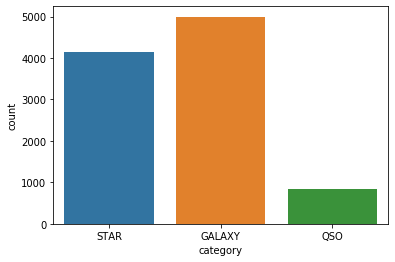

In [7]:
sns.countplot(x='category',data=df)
plt.show()

In [8]:
#Lets convert all category column into numerical values data into numerical data.

In [9]:
le = LabelEncoder()
df['category']=le.fit_transform(df['category'])

In [10]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,category,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


In [11]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
category     0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

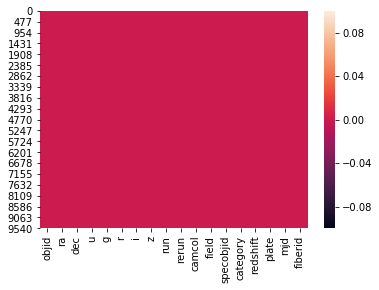

In [14]:
#lets check is there any nullvalues
sns.heatmap(df.isnull())

In [15]:
#Lets check data types
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
category       int32
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
category     10000 non-null int32
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int32(1), int64(7)
memory usage: 1.3 MB


In [17]:
#Lets describe the data statistically
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,category,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


In [18]:
df.objid.value_counts()

1.237650e+18    10000
Name: objid, dtype: int64

In [19]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,category,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,-3.355500e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.321896e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,-5.891815e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,-2.690437e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,-9.921163e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.962769e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,1.467908e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,2.157584e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,-7.816172e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#lets drop rerun and objid column as the value is same throughout the data set.
df.drop('rerun',axis=1,inplace=True)
df.drop('objid',axis=1,inplace=True)

In [21]:
df.shape

(10000, 16)

In [22]:
dfcor= df.corr()
dfcor

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,category,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,-0.095327,-0.043219,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.088345,-0.058918,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,-0.129429,-0.269044,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,-0.054979,-0.099212,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.019788,0.049628,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.072960,0.146791,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.112398,0.215758,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.093604,-0.078162,0.059056,0.093601,0.070354,0.138566
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.040809,-0.006186,0.006834,0.040795,0.026284,0.535629
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,-0.093724,0.007713,0.015414,-0.093723,-0.086558,-0.040493


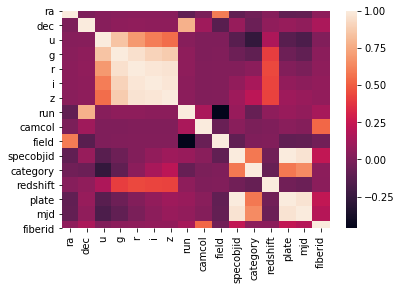

In [23]:
sns.heatmap(dfcor)

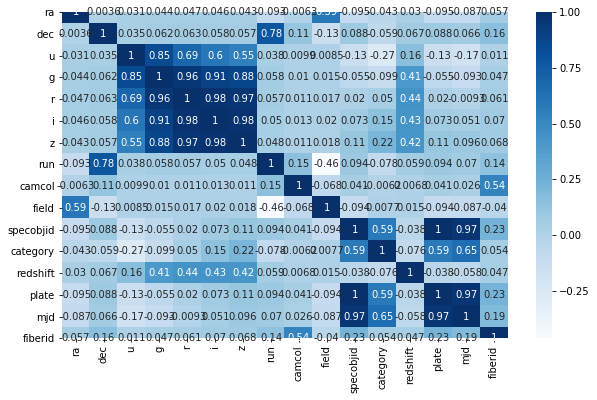

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

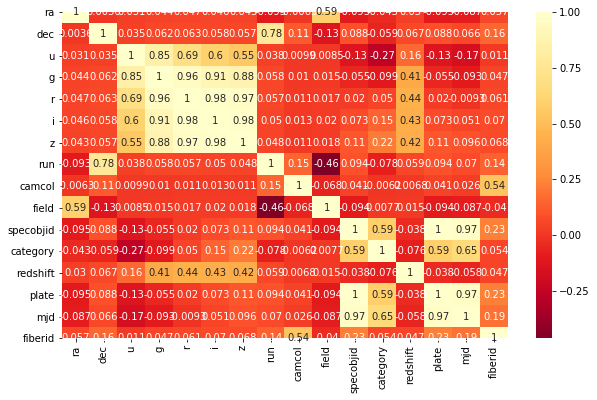

In [25]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

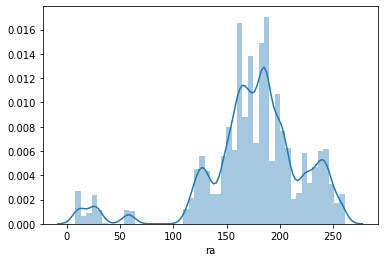

In [26]:
#Lets do univariate analysis
sns.distplot(df['ra'])

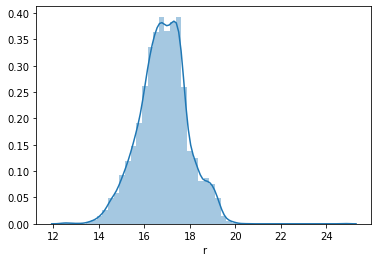

In [27]:
sns.distplot(df['r'])

In [28]:
collist=df.columns.values
ncol=15
nrows=15

In [29]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
category     0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [30]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [31]:
df.skew()

ra          -1.227350
dec          0.152301
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    0.696181
category     0.169292
redshift     3.513844
plate        0.696680
mjd          1.011097
fiberid      0.308053
dtype: float64

In [32]:
df.isnull().sum()

ra              0
dec          1170
u               0
g               0
r               0
i               0
z               0
run             0
camcol          0
field           0
specobjid       0
category        0
redshift        0
plate           0
mjd             0
fiberid         0
dtype: int64

In [33]:
#lets fill thr null value with mean
df['dec']=df['dec'].replace(np.NaN,df['dec'].mean())

In [34]:
df.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
category     0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

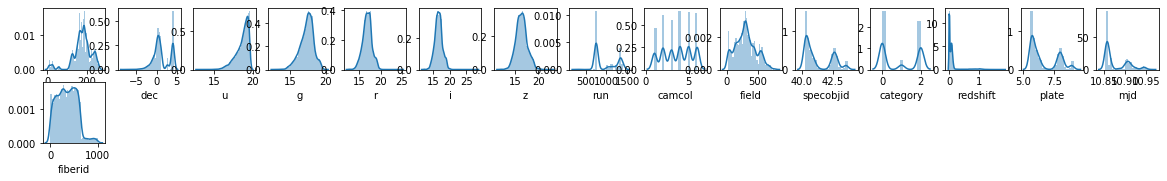

In [35]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

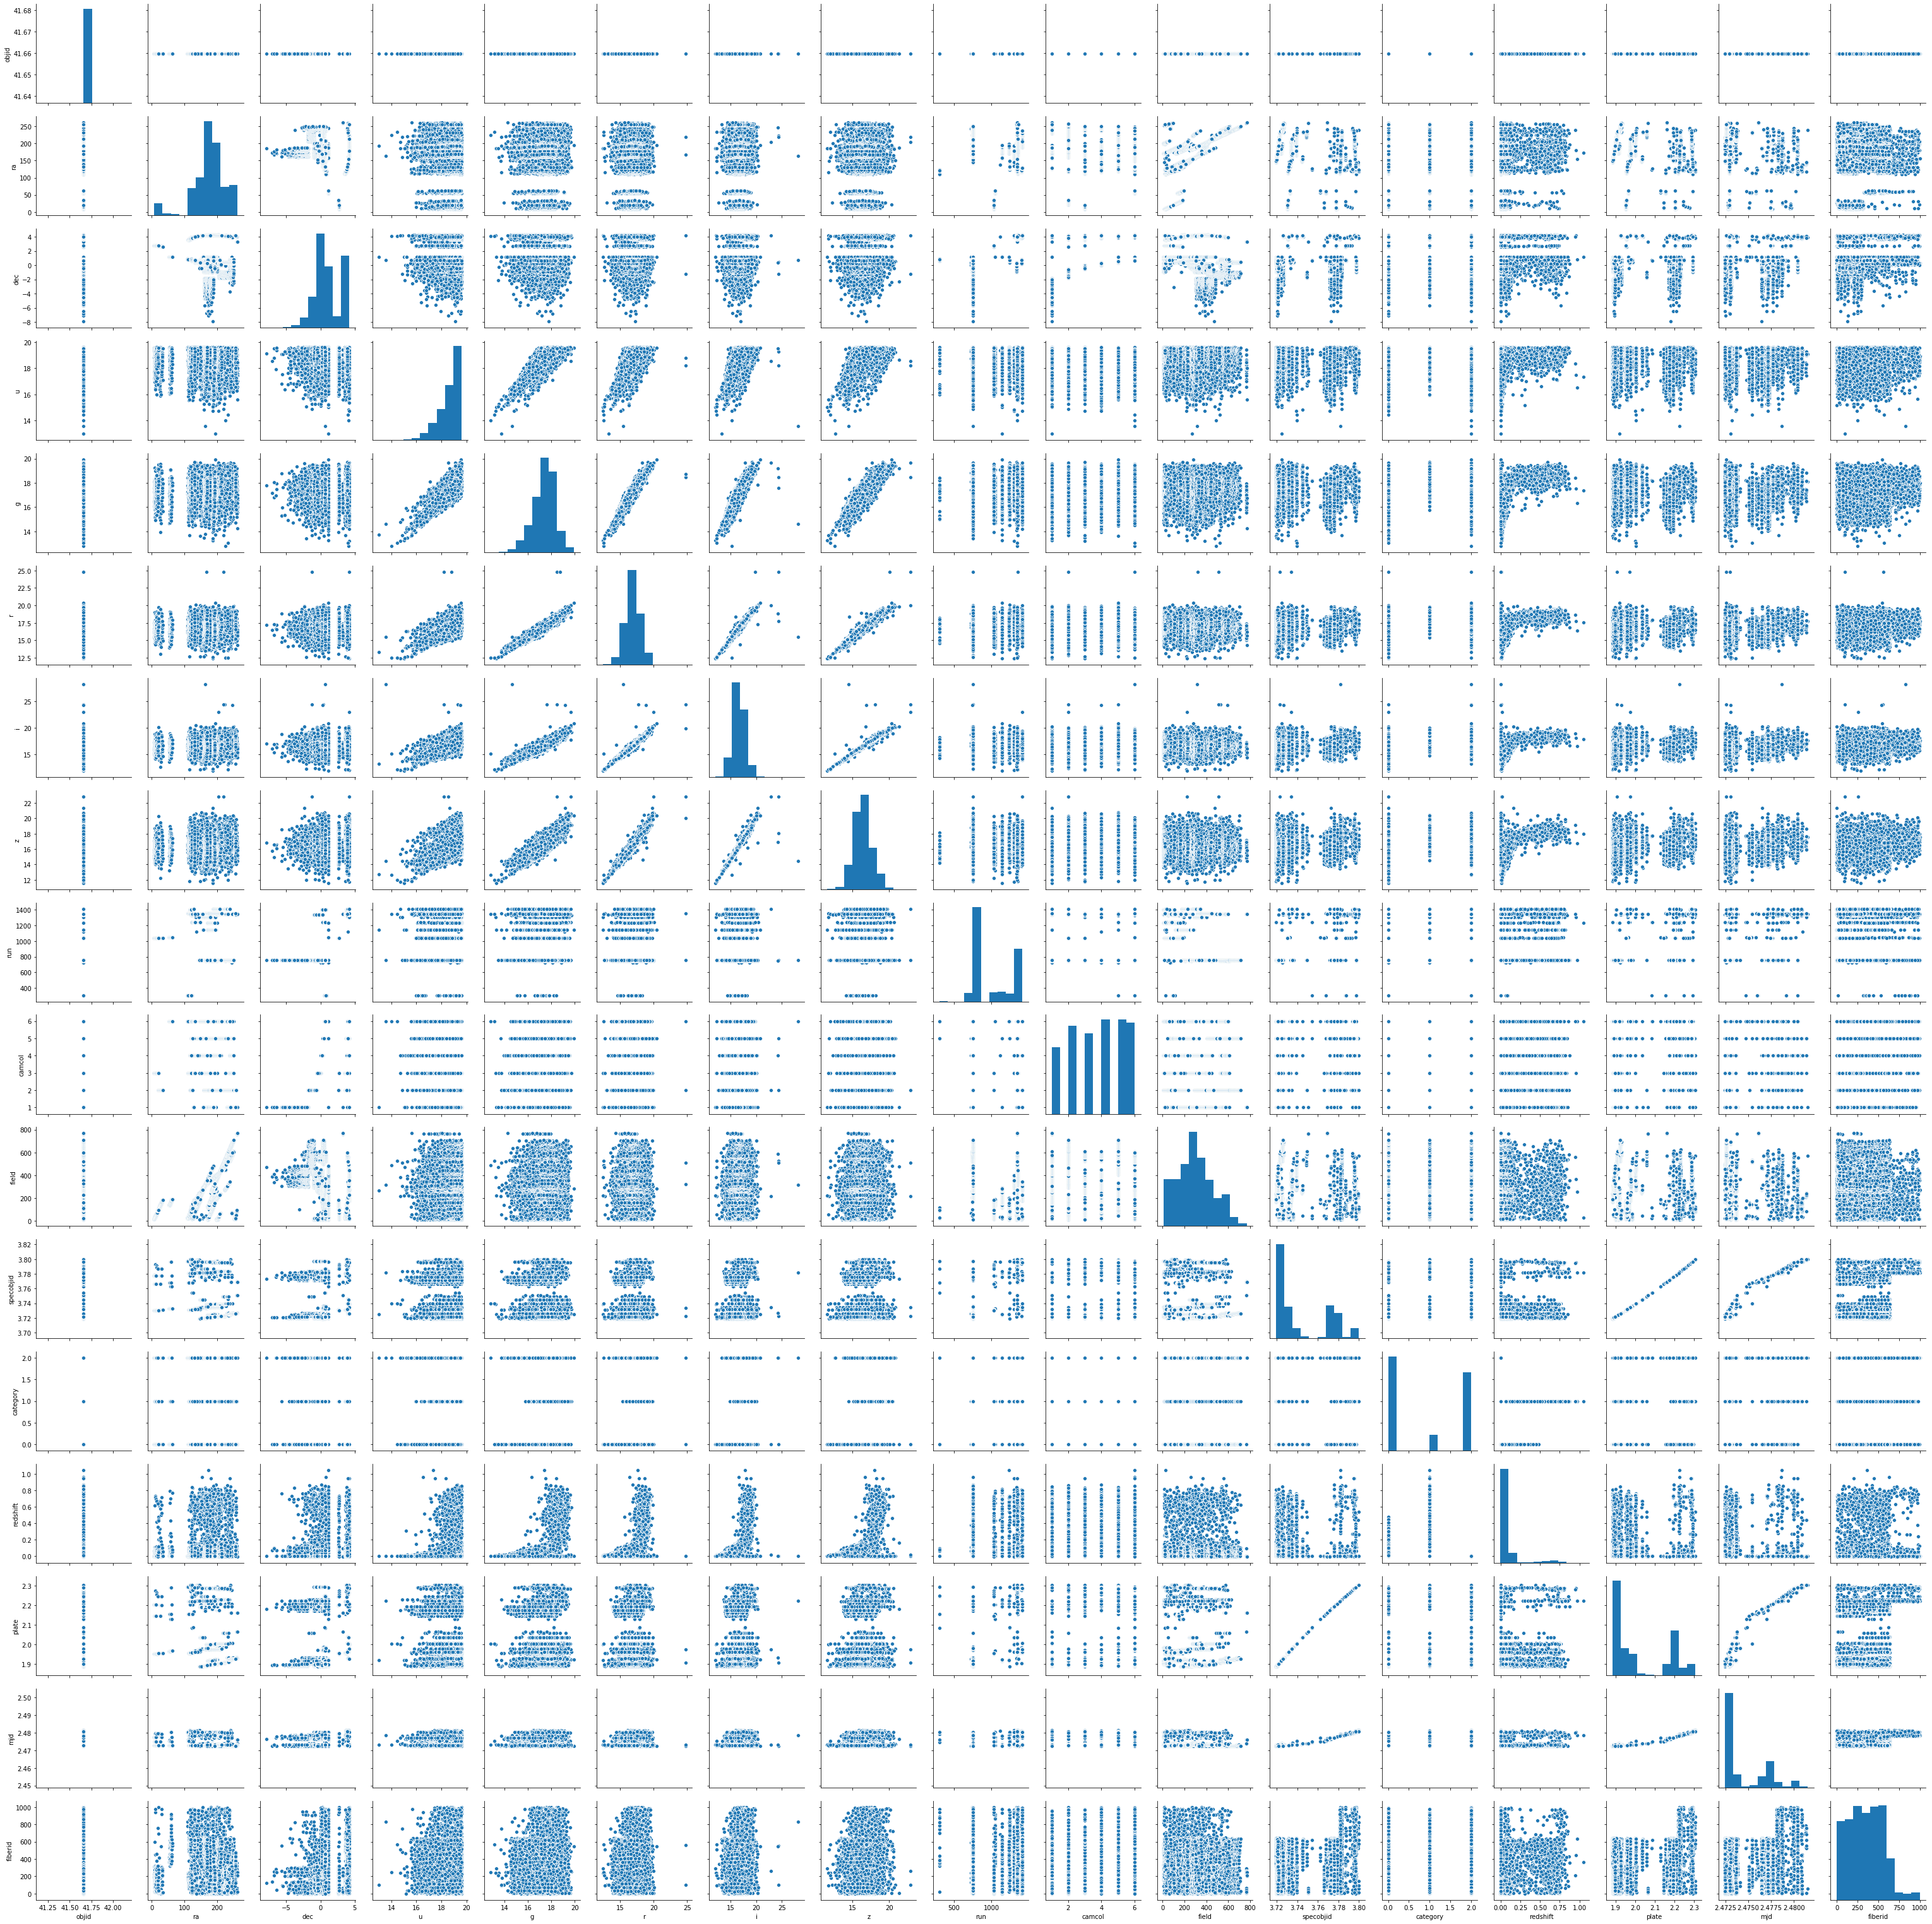

In [132]:
sns.pairplot(df)

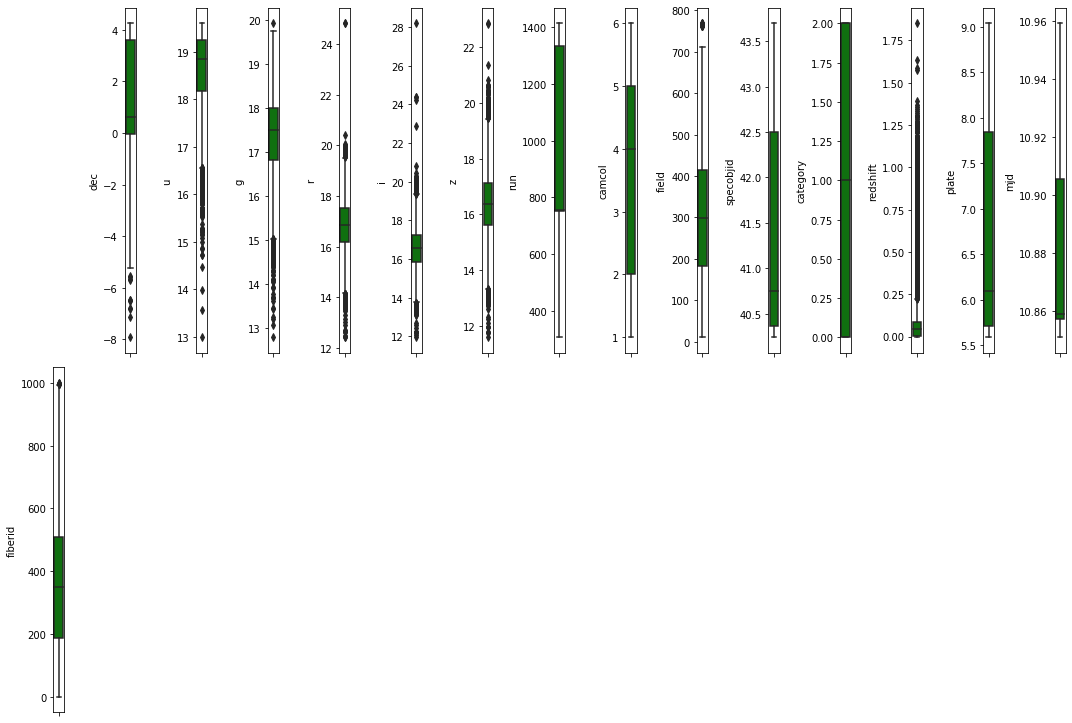

In [36]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

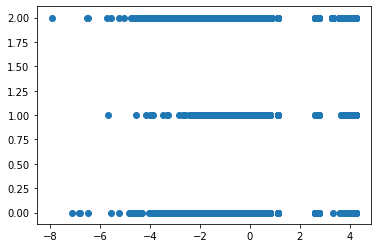

In [134]:
plt.scatter(df['dec'],df['category'])

# 4.Pre-processing Pipeline

In [37]:
#Now treating the outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[0.16745842, 0.52743655, 1.03148637, ..., 1.33686899, 1.31795397,
        0.66863177],
       [0.16886159, 0.50685587, 0.05243046, ..., 0.77911248, 0.8888972 ,
        0.91101156],
       [0.17057433, 0.51089684, 0.92156796, ..., 0.88639661, 0.60910028,
        0.77527888],
       ...,
       [0.92039468, 1.41982398, 0.16753826, ..., 2.05861867, 2.64577279,
        1.3036668 ],
       [0.92197294, 1.42064399, 0.31801835, ..., 0.48394783, 0.70897077,
        0.60143828],
       [0.91804124, 1.42114098, 0.79229193, ..., 0.48394783, 0.70897077,
        0.5820479 ]])

In [40]:
threshold = 3
print(np.where(z>3))

(array([  17,   45,  104, ..., 9929, 9940, 9956], dtype=int64), array([12, 12,  1, ...,  2, 12, 12], dtype=int64))


In [41]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers

In [42]:
z[17][13]

0.886396606276659

In [43]:
df_new

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,category,redshift,plate,mjd,fiberid
0,183.531326,0.085896,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,42.760890,2,-0.000009,8.103797,10.913687,491
1,183.598371,0.126884,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,40.435419,2,-0.000055,5.780744,10.851587,541
2,183.680207,0.118836,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,40.317277,0,0.116103,5.662960,10.859460,513
3,183.870529,0.048705,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,42.760892,2,-0.000111,8.103797,10.913687,510
4,183.883288,0.097632,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,42.760892,2,0.000590,8.103797,10.913687,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,3.961566,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,40.760052,0,0.027209,6.104793,10.856650,246
9996,131.306083,3.964071,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,40.760042,0,0.111338,6.104793,10.856650,228
9997,131.552562,3.963989,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,43.553421,2,-0.000402,8.896177,10.951052,622
9998,131.477151,3.965622,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,40.760042,0,0.013922,6.104793,10.856650,229


In [44]:
df.shape

(10000, 16)

In [45]:
df_new.shape

(8984, 16)

In [248]:
#Now lets train and test our data. Here our target variable is y i.e category, and our input variables is x

In [46]:
df1=df_new[['ra','dec','u','g','r','i','z','run','camcol','field','specobjid','redshift','plate','mjd','fiberid']]

In [47]:
x=df1

In [48]:
x.shape

(8984, 15)

In [49]:
df1.skew()

ra          -0.226162
dec          0.312951
u           -0.969942
g           -0.560412
r           -0.182337
i            0.021571
z            0.127220
run          0.443070
camcol      -0.161892
field        0.229774
specobjid    0.713042
redshift     4.198436
plate        0.713541
mjd          1.021621
fiberid      0.172847
dtype: float64

In [50]:
y=df_new[['category']]

In [51]:
y.shape

(8984, 1)

In [253]:
#Scaling the input variable
#Algorithm requires all features to be on common scale

In [52]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [53]:
df1.skew()

ra          -0.226162
dec          0.312951
u           -0.969942
g           -0.560412
r           -0.182337
i            0.021571
z            0.127220
run          0.443070
camcol      -0.161892
field        0.229774
specobjid    0.713042
redshift     4.198436
plate        0.713541
mjd          1.021621
fiberid      0.172847
dtype: float64

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [55]:
x_train.shape

(6019, 15)

In [56]:
y_train.shape

(6019, 1)

In [57]:
y_test.shape

(2965, 1)

In [58]:
x_test.shape

(2965, 15)

# 6.Building Machine Learning Mode

In [260]:
#Lets do gridsearch for various classification models to find the best parameters.

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini','entropy']
}

#gridk = {'kernel' :['linear','rbf','ploy']}
gd_sr = GridSearchCV(estimator=dtc,
                    param_grid=grid_param,
                    scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)



{'criterion': 'entropy'}
0.984973285841496


In [61]:
#Grid Search for Algorithm Tuning

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

dataset = df
parameters = {'kernel':('linear','rbf','poly'),'C':[1,10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9906500445235975
linear
{'C': 10, 'kernel': 'linear'}


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
param_grid ={
    'n_neighbors':[1,2,3,4,5],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}


gd_sr = GridSearchCV(estimator=knn,
                    param_grid=param_grid,
                    scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
0.9260908281389136


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gd_sr = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}
0.9882012466607302


In [280]:
 #Lets perform models using best parameters

In [65]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',C=10)
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('actual and predicted value score',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

actual and predicted value score 0.9929173693086003
[[1605    2   11]
 [   8  112    0]
 [   0    0 1227]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1618
           1       0.98      0.93      0.96       120
           2       0.99      1.00      1.00      1227

    accuracy                           0.99      2965
   macro avg       0.99      0.98      0.98      2965
weighted avg       0.99      0.99      0.99      2965



In [66]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=4,weights='distance',algorithm='auto')
Knn.fit(x_train,y_train)
predknn = Knn.predict(x_test)
predknn
print('accuracy_score',accuracy_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score 0.9345699831365936
[[1542    5   71]
 [  19   98    3]
 [  96    0 1131]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1618
           1       0.95      0.82      0.88       120
           2       0.94      0.92      0.93      1227

    accuracy                           0.93      2965
   macro avg       0.94      0.90      0.92      2965
weighted avg       0.93      0.93      0.93      2965



In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200,max_features ='sqrt',max_depth = 8,criterion='gini')

rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
predrf

print('predicted',predrf)
print('actual',y_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

predicted [2 2 2 ... 2 0 0]
actual       category
7898         2
95           2
812          2
7177         0
8709         2
...        ...
6912         0
4357         0
6588         2
4784         0
1171         0

[2965 rows x 1 columns]
0.9881956155143339
[[1607    4    7]
 [  24   96    0]
 [   0    0 1227]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1618
           1       0.96      0.80      0.87       120
           2       0.99      1.00      1.00      1227

    accuracy                           0.99      2965
   macro avg       0.98      0.93      0.95      2965
weighted avg       0.99      0.99      0.99      2965



In [285]:
#Cross Validating to avoid overfitting and under fitting of the model.

In [69]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.9894327  0.99276974 0.9922049  0.98775056 0.9922049 ]
0.9908725607021909
0.001947801760859566


In [71]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.93381535 0.93826474 0.9142539  0.89476615 0.92594655]
0.9214093362830763
0.015618321941370982


In [72]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(dct,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.98665184 0.98720801 0.9844098  0.98162584 0.98051225]
0.984081545691699
0.0026555339052127466


In [73]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.98609566 0.99054505 0.99053452 0.98329621 0.98830735]
0.9877557593069259
0.0027730626340406422


In [ ]:
# From above we cab see that SVC is giving best accuracy score.Therefore we will save this model.

In [75]:
from sklearn.externals import joblib
joblib.dump(rf,'svcsky.obj')
svc_from_joblib = joblib.load('svcsky.obj')
svc_from_joblib.predict(x_test)

array([2, 2, 2, ..., 2, 0, 0])